# Topic Modeling

- El *topic modeling* es una técnica para extraer los temas "ocultos" que hay en un conjunto de textos o corpus.

- Es una técnica no supervisada.

- Aplicaciones: selección de temas automático de diferentes elementos: tweets, artículos, etc.

- La técnicas más usadas para extracción de temas son

    - ***LSI:*** Latent Semantic Index

    -***LDA***: Latent Dirichlet Allocation

    - ***PLSI:*** Probabilistic Latent Semantic Index

- Este método consiste en buscar factores que representen a las palbaras y documentos del corpus. A estos factores, se les da el nombre de **factores latentes**

- Buscamos: 

   - Relación entre documentos

   - Relación entre palabras

   - Extraer los temas




Para hacer lo anterior debemos representar el corpus mediante una matriz, que como hemos visto, se hace por medio de una **bolsa de palabras** así:

- **Fila:** representa cada documento.

- **Columna:** representa cada palabra.

- **Entrada $(i,j):$** número de veces que se repite la palabra en el documento.

**Obs:** La matriz no necesariamente es cuadrada.

Lo que buscamos es hacer una descomposición de la forma:

$$\begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & Corpus &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} =  \begin{bmatrix}
\: \\ 
\: \\ 
  Documentos\\ 
  _{nxK}\\ 
\:
\end{bmatrix} \cdot \begin{bmatrix} 
  Palabras\\ 
  _{Kxm}\\ 
\end{bmatrix}$$

con

$$\left\{ \begin{matrix}
n: Número \: de \: Documentos\\ 
m: Número \: de \: Palabras\\ 
K: Número \: de \: Factores \: Latentes
\end{matrix}\right.$$


# Vamos a ver un ejemplo numérico

* Consideremos matriz que representa una Bolsa de Palabras con:

    - Las filas representan a los documentos ($n$ documentos)

    - Las columnas representan a las palabras ($m$ palabras)
    
    
* Podemos descomponer esa matriz en tres matrices ***U***, ***S*** y ***V***, cuyo producto matricial es la matriz original ***A***.

$$\begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & A &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} =  \begin{bmatrix}
 &  &  &  & \\ 
 &  &  &  & \\ 
 &  & U &  & \\ 
 &  & _{nxn} &  & \\ 
 &  &  &  & 
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & S &  &  & \\ 
 &  &  & _{nxm} &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} \cdot \begin{bmatrix}
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  & V^{t} &  &  & \\ 
 &  &  & _{mxm} &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & \\ 
 &  &  &  &  &  & 
\end{bmatrix} $$


* Cada una de estas matrices contiene la siguiente información:

    * ***Matriz U***: Contiene los valores de los ***factores latentes de las palabras***.
    * ***Matriz V***: Contiene los valores de los ***factores latentes de los documentos***.
    * ***Matriz S***: Matriz en cuya diagonal estan los llamados ***Valores singulares*** que tienen que ser valores decrecientes y no negativos. Los valores de la diagonal representan la importancia que tienen cada uno de los factores latentes de las palabras y de los documentos.

<hr>

# Cálculo Analítico: de las matrices U, S y V

### Para calcular la matriz U.

1. Se multiplica la matriz ***A*** por su traspuesta (***$A. A^{T}$***) para obtener una matriz cuadrada de dimensión ***nxn***


2. Se calculan los autovalores de la matriz cuadrada (***$A_1 = A. A^{T}$***) usando el polínomio característico:

$$det(A_{1}-\lambda I) = 0$$


3. Se calculan los autovectores asociados a cada autovalor (en orden decreciente por autovalor)


### Para calcular la matriz $S$


1. Una vez hayamos calculado los autovalores de $A_1$, se pone en la diagonal de la matriz ***$S$*** la raiz cuadrada del los autovalores en orden decreciente. El resto de elementos de la matriz ***$S$*** tendrán valor ***$0$***


### Cálculo de la matriz V

1. Se multiplica ***$A_2 = A^{T}A$*** para obtener una matriz cuadrada de dimensión ***mxm***


2. Se calculan los autovectores asociados a cada autovalor (ya calculados) en orden descendente.

$$det(A_{2}-\lambda I) = 0$$

<hr>


# Ejemplo 
Hallar $U$ , $V$ y $S$

$$A = \begin{bmatrix}
2 & 3 & 0 \\
1 & 0 & 1
\end{bmatrix}$$


# Ejemplo de ilustración básico

Consideremos los siguientes documentos

- **doc1:** petro petro reforma ovnis

- **doc1:** petro reforma reforma reforma

- **doc1:** marzo marzo universo ovnis

- **doc1:** universo universo marzo

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

documentos = ['petro petro reforma ovnis',
             'petro reforma reforma reforma',
             'marzo marzo universo ovnis',
             'universo universo marzo']

# vamos a vectorizar
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(documentos)

# Creamos el data.frame
pd.DataFrame(matrix.toarray(), index=['doc 1', 'doc 2', 'doc 3', 'doc 4'], columns=vectorizer.get_feature_names_out()).head()


,marzo,ovnis,petro,reforma,universo
doc 1,0,1,2,1,0
doc 2,0,0,1,3,0
doc 3,2,1,0,0,1
doc 4,1,0,0,0,2


- Para obtener los *factores latentes* vamos a realizar la ***SVD*** (descomposición en valores singulares).

- Cuando aplicamos este método tenemos tres matrices: $U$, $V$, $V$.

- Aplicamos los siguiente:

   - ***Factores latentes de los documentos*** = $U · S$

   - ***Factores latentes de las palabras*** = $S · V$

In [2]:
from sklearn.decomposition import TruncatedSVD
# para colocar solo dos decimales
pd.options.display.float_format = '{:,.2f}'.format
# Descomposición en VALORES SINGULARES (SVD)
svd = TruncatedSVD(n_components=2)
# MATRIZ U - para documentos
U_S = svd.fit_transform(matrix)

# Resultados
pd.DataFrame(U_S, index=['doc 1', 'doc 2', 'doc 3', 'doc 4'], columns=['Factor 1', 'Factor 2']).head()

,Factor 1,Factor 2
doc 1,2.07,0.04
doc 2,3.00,-0.43
doc 3,0.37,2.29
doc 4,0.18,2.02


## ¿Qué podemos decir?

LOS DOCUMENTOS 1 Y 2 ESTAN MÁS CERCANOS Y LOS DOCUMENTOS 3 Y 4 SE ENCUENTRAN MÁS CERCA, PODEMOS VER UNA SIMILARIDAD ENTRE LOS DOCUEMNTOS VER LOS FACTORES QUE ESTAN MÁS CERCANOS.

In [3]:
import numpy as np
# MATRIZ V - para las palabras
V_S = np.dot(np.diag(svd.singular_values_), svd.components_)

# Resultados
pd.DataFrame(V_S, index=['Factor 1', 'Factor 2'], columns=vectorizer.get_feature_names_out()).head()

,marzo,ovnis,petro,reforma,universo
Factor 1,0.25,0.67,1.95,3.02,0.20
Factor 2,2.14,0.76,-0.11,-0.41,2.05


## ¿Qué podemos decir?
V da los factores por cada una de las palabras parecido a los componentes principales. Clasificar un nuevo elemento y multiplico cada valor del producto y coge el más grande. Los pesos son los que me ayudan a clasificar siguiendo la formula de (peso $\times$ frecuancia) mulriplicando cada entrada del factor.

# Método LSI :  Latent Semantic Index

El ***LSI*** es una técnica de factorización matricial que se aplica en Procesamiento de Lenguaje Natural que busca analizar  las relaciones entre los documentos de un corpus y las palabras. 


* El ***LSI*** asume que las palabras que tienen un significado similar, aparecerán en partes de documentos similares.


* El ***LSI*** tiene como finalidad extraer una serie de factores latentes que caractericen a los documentos y las palabras del corpus.


* Necesitaremos una matriz de frecuencias que represente el número de veces que aparecen las palabras en los documentos:

    - ***Filas***: Cada fila representa a una palabra.

    - ***Columnas***: Cada columna representa a un documento.
  
    - ***Entrada $(i,j)$***: Cada entrada $(i,j)$ representa el número de veces que aparece la palabra en el documento.
    
    
* El LSI descompone una matriz **$A$** (de frecuencias); que esta formada por el número de apariciones de cada palabra en cada documento, en tres matrices **$U$** , **$V$**, **$S$** cuyo producto matricial es igual a la matriz original **$A$**: 


$$ SVD(A) = U \cdot S \cdot V^{t}$$


* Donde cada una de estas matrices contiene la siguiente información:

    - ***Matriz $U$*** contiene los valores de los ***factores latentes de las palabras***. 

    - ***Matriz $V$*** contiene los valores de los ***factores latentes de los documentos***.

    - ***Matriz $S$*** es una matriz en cuya diagonal están los llamados valores singulares que son decrecientes y no negativos. Esta matriz representa la ***importancia que tiene cada uno de los factores latentes de las palabras y de los documentos***. 
    
    
<center><img src="https://github.com/Fabian830348/cursos/blob/master/Imagen/lsi.png?raw=true" alt="centered image" width="500" height="150"></center>


* Como la matriz ***$S$*** nos informa de la importancia que tiene cada uno de los factores latentes, podemos coger solo los ***K-factores más importantes*** para caracterizar cada una de las palabras y de los items. 


* De esta forma se trabaja con matrices más reducidas lo que nos permite comprimir la información de la matriz de apariciones.


* El SVD tiene una propiedad muy importante que viene dada por el ***teorema de Eckart-Young***, que afirma que la mejor aproximación a la matriz ***$A$*** la obtenemos poniendo a ceros los ***$k$*** valores singulares de menor a mayor valor; es decir, reduciendo la matriz ***$S$***. Por tanto si multiplicamos las submatrices ***$U$*** , ***$S$*** y ***$V$*** obtenemos matriz ***$A'$*** de rango ***$k$*** que mejor aproxima (de acuerdo con la norma de Frobenius) a la matriz ***$A$***.

$$\|A \|_{F}= \left( \sum \limits_{i=1}^{m} \sum \limits_{j=1}^{n} |a_{ij}|^2 \right)^{1/2} $$


<img src="./imgs/016_LSI_Matrix_reduc.png" style="width: 800px;"/>


* El valor de ***$k$***, va a representar el número de temas en que vamos a dividir (o Clusterizar) nuestro corpus, por lo tanto la selección del número de temas es un valor que tenemos que definir previamente 

* Para poder trabajar en la extracción de tópicos y ver las relaciones entre los documentos y las palabras, vamos trabajar con las matrices:

    - ***$U_k$***: Estudiar las relaciones entre palabras
    - ***$V_k$***: Estudiar las relaciones entre documentos
    - ***$k$***: Número de temas que tendrá a priori el Corpus
    

# Ejemplo

Tenemos el siguiente documento

In [4]:
documento = ["juego juego juego soccer soccer campeonato campeonato campeonato ronaldo ronaldo ronaldo ronaldo ronaldo messi",
      "soccer soccer soccer soccer soccer ronaldo ronaldo ronaldo ronaldo messi messi",
      "juego juego soccer soccer soccer soccer soccer soccer soccer messi messi messi messi messi",
      "educacion educacion educacion educacion MEN MEN MEN MEN MEN MEN gaviria gaviria gaviria gaviria gaviria",
      "educacion educacion educacion educacion MEN MEN MEN deuda deuda deuda deuda colegios colegios colegios gaviria",
      "educacion educacion educacion educacion deuda deuda deuda deuda deuda deuda colegios colegios colegios colegios colegios",
      "dinero fmi fmi fmi fmi fmi ue ue ue ue pib pib pib ibex ibex",
      "colegios gaviria dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ue pib",
      "MEN deuda colegios gaviria dinero dinero dinero dinero fmi fmi fmi fmi ue ue ue ",
      "soccer educacion pib",
      "soccer colegios campeonato gaviria"]


**este trata tres temas a saber: soccer, educación, economía**

In [7]:
# para imprimir de otra forma
from pprint import pprint
# diccionario de gensim
from gensim import corpora
from collections import defaultdict

# Tokenizamos
documents = [word.split() for word in documento]

# Creamos el diccionario (vocabulario)
frequency = defaultdict(int)
for doc in documents:
    for token in doc:
        frequency[token] += 1
        
documents = [[token for token in doc] for doc in documents]
dictionary = corpora.Dictionary(documents)
print('Diccionario:')
pprint(dictionary.token2id)

# Creamos la Bolsa de Palabras (Indice de la palabra, frecuencia)
corpus = [dictionary.doc2bow(doc) for doc in documents]
print('\nBolsa de Palabras:')
pprint(corpus)

Diccionario:
{'MEN': 5,
 'campeonato': 0,
 'colegios': 8,
 'deuda': 9,
 'dinero': 10,
 'educacion': 6,
 'fmi': 11,
 'gaviria': 7,
 'ibex': 12,
 'juego': 1,
 'messi': 2,
 'pib': 13,
 'ronaldo': 3,
 'soccer': 4,
 'ue': 14}

Bolsa de Palabras:
[[(0, 3), (1, 3), (2, 1), (3, 5), (4, 2)],
 [(2, 2), (3, 4), (4, 5)],
 [(1, 2), (2, 5), (4, 7)],
 [(5, 6), (6, 4), (7, 5)],
 [(5, 3), (6, 4), (7, 1), (8, 3), (9, 4)],
 [(6, 4), (8, 5), (9, 6)],
 [(10, 1), (11, 5), (12, 2), (13, 3), (14, 4)],
 [(7, 1), (8, 1), (10, 4), (11, 4), (13, 1), (14, 4)],
 [(5, 1), (7, 1), (8, 1), (9, 1), (10, 4), (11, 4), (14, 3)],
 [(4, 1), (6, 1), (13, 1)],
 [(0, 1), (4, 1), (7, 1), (8, 1)]]


# Creación del modelo

- La librería Gensim tiene ***LSI*** en **LSiModel**

- Requerimos

   - Corpus

   - Número de temas

   - Diccionario o vocabulario del corpus

In [8]:
from gensim.models import LsiModel
#Factores latentes y son tres por que hay tres topicos
Lsi_model = LsiModel(corpus=corpus, num_topics=3, id2word=dictionary)

- Vamos a ver la matriz ***$U$***

- Esta matriz tiene los ***factores latentes de cada una de las palabras***

In [9]:
# Las palabras.
U_matrix = Lsi_model.projection.u
U_matrix

array([[ 0.0080157 , -0.12147793, -0.00477548],
       [ 0.00764122, -0.23838329, -0.01351154],
       [ 0.01436787, -0.44343298, -0.02506618],
       [ 0.01216459, -0.38311209, -0.02178312],
       [ 0.03238081, -0.76194106, -0.03952318],
       [ 0.34610872,  0.00491806,  0.20925565],
       [ 0.45080378, -0.00342558,  0.35923484],
       [ 0.26841352,  0.00105663,  0.07889487],
       [ 0.37700371,  0.00176928,  0.1817653 ],
       [ 0.42300698,  0.00545779,  0.28893431],
       [ 0.25466521,  0.03058342, -0.36521087],
       [ 0.34588865,  0.04406739, -0.55200635],
       [ 0.04561172,  0.00674199, -0.09339774],
       [ 0.09993979,  0.00781257, -0.18348589],
       [ 0.29289059,  0.03742915, -0.47017643]])

Podemos ver los factores asociados a cada palabra

In [10]:
import pandas as pd
pd.DataFrame(U_matrix, columns=['Topic 1', 'Topic 2', 'Topic 3'], 
             index=dictionary.token2id.keys()).head(15)

,Topic 1,Topic 2,Topic 3
campeonato,0.01,-0.12,-0.00
juego,0.01,-0.24,-0.01
messi,0.01,-0.44,-0.03
ronaldo,0.01,-0.38,-0.02
soccer,0.03,-0.76,-0.04
MEN,0.35,0.00,0.21
educacion,0.45,-0.00,0.36
gaviria,0.27,0.00,0.08
colegios,0.38,0.00,0.18
deuda,0.42,0.01,0.29


Ahora, veamos la matriz ***$S$***, la cual nos da la importancia de los **factores latentes**

In [12]:
S_matrix = Lsi_model.projection.s
S_matrix

array([12.47067133, 11.39302903, 11.08980301])

Luego, la matriz ***$V$*** que tiene los **fcatores latentes de cada documento del corpus**.

In [26]:
from gensim.matutils import corpus2dense
V_matrix = corpus2dense(Lsi_model[corpus], len(Lsi_model.projection.s)).T / Lsi_model.projection.s 
V_matrix

array([[ 0.01498903, -0.43556977, -0.02415635],
       [ 0.01918888, -0.54673956, -0.03019718],
       [ 0.02516204, -0.70459921, -0.03868565],
       [ 0.41873726,  0.00185106,  0.27835911],
       [ 0.47575577,  0.00256714,  0.34668193],
       [ 0.49927348,  0.00244806,  0.36784891],
       [ 0.28440438,  0.03840583, -0.51788127],
       [ 0.3463434 ,  0.04028414, -0.49346234],
       [ 0.37651704,  0.03722386, -0.38959647],
       [ 0.04675966, -0.06649277,  0.01228388],
       [ 0.05499413, -0.07729227,  0.01950995]])

De igual forma que con **$U$** hallamos los facores por documento

In [15]:
index = ['doc {}'.format(i+1) for i,doc in enumerate(documents)]
pd.DataFrame(V_matrix, index=index, columns=['Topic 1', 'Topic 2', 'Topic 3'])

,Topic 1,Topic 2,Topic 3
doc 1,0.01,-0.44,-0.02
doc 2,0.02,-0.55,-0.03
doc 3,0.03,-0.70,-0.04
doc 4,0.42,0.00,0.28
doc 5,0.48,0.00,0.35
doc 6,0.50,0.00,0.37
doc 7,0.28,0.04,-0.52
doc 8,0.35,0.04,-0.49
doc 9,0.38,0.04,-0.39
doc 10,0.05,-0.07,0.01


¿Que podemos indicar?

- El valor de los factores guarda alguna relación con el tema que se trata en el documento. 

   - (doc4, doc5, doc6) guardan relación con el tópico 1 y están relacionados.

   - (doc1, doc2, doc3) guardan relación con el tópico 2.

- Palabras características de cada tema tienen valores latentes similares

- Si graficamos factores latentes de palabras y documentos (factores 2 y 3) están muy cerca entre cada uno de ellos. 


Veamos la gráfica

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Este agrupa el documento y los clasicica segun la mayor magnitud de los pesos
df = pd.DataFrame({'f2': V_matrix[:,1], 'f3': V_matrix[:,2],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

df

,f2,f3,group
0,-0.44,-0.02,Doc 1
1,-0.55,-0.03,Doc 2
2,-0.70,-0.04,Doc 3
3,0.00,0.28,Doc 4
4,0.00,0.35,Doc 5
5,0.00,0.37,Doc 6
6,0.04,-0.52,Doc 7
7,0.04,-0.49,Doc 8
8,0.04,-0.39,Doc 9
9,-0.07,0.01,Doc 10


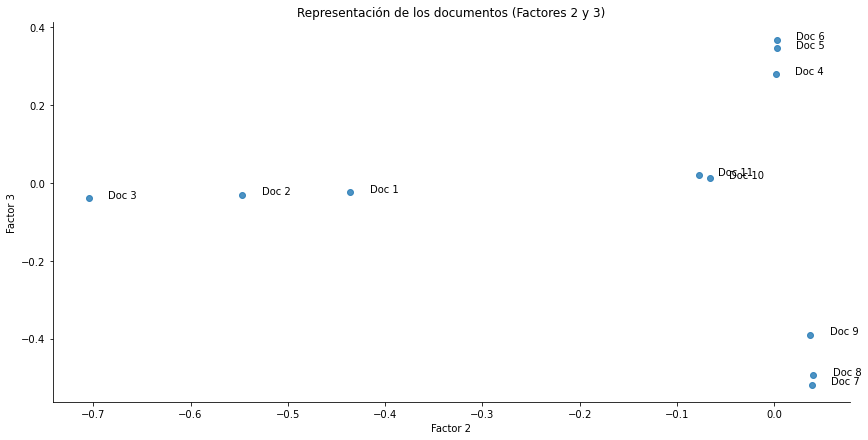

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame({'f2': V_matrix[:,1], 'f3': V_matrix[:,2],
                   'group': ['Doc {}'.format(i+1) for i,doc in enumerate(documents)]})

sns.lmplot(data = df, x= "f2" , y = "f3", fit_reg=False, height=6, aspect=2)

plt.title('Representación de los documentos (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(df.f2, df.f3, df.group, plt.gca())

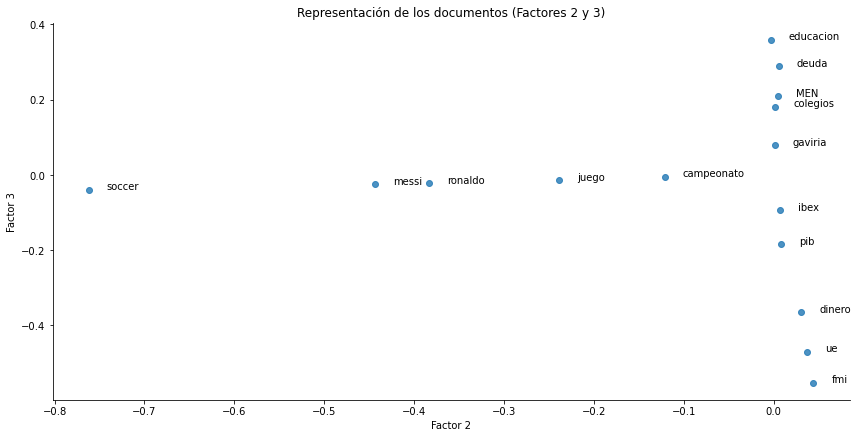

In [18]:
df = pd.DataFrame({'f2': U_matrix[:,1], 'f3': U_matrix[:,2],
                   'group': [word for word in dictionary.token2id.keys()]})

sns.lmplot(data = df, x= "f2" , y = "f3", fit_reg=False, height=6, aspect=2)

plt.title('Representación de los documentos (Factores 2 y 3)')
plt.xlabel('Factor 2')
plt.ylabel('Factor 3')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))
        
label_point(df.f2, df.f3, df.group, plt.gca())

Gensim nos muestra una fórmula por tema.

- Esta indica el grado de pertenencia a un determinado tema 

- El valor más grande hay más posibildidad de aparcer en ese tema

In [20]:
# Formulas d eclasificiación (Peso*frecuencia) -> (peso * variable)
Lsi_model.print_topics()

[(0,
  '0.451*"educacion" + 0.423*"deuda" + 0.377*"colegios" + 0.346*"MEN" + 0.346*"fmi" + 0.293*"ue" + 0.268*"gaviria" + 0.255*"dinero" + 0.100*"pib" + 0.046*"ibex"'),
 (1,
  '-0.762*"soccer" + -0.443*"messi" + -0.383*"ronaldo" + -0.238*"juego" + -0.121*"campeonato" + 0.044*"fmi" + 0.037*"ue" + 0.031*"dinero" + 0.008*"pib" + 0.007*"ibex"'),
 (2,
  '-0.552*"fmi" + -0.470*"ue" + -0.365*"dinero" + 0.359*"educacion" + 0.289*"deuda" + 0.209*"MEN" + -0.183*"pib" + 0.182*"colegios" + -0.093*"ibex" + 0.079*"gaviria"')]

# Ejemplo

- Podemos asignar un tema a un documento nuevo

- Se debe calcular los fcatores latentes del nuevo documento en función del vector de apariciones de palabras y calcular la similaridad con el resto de documentos en función de sus factores latentes.

- Usamos la fórmula

$$FactoresLatentes(new) = VectorPalabras(new). U_k S^{-1}$$

In [21]:
new_doc = "soccer soccer messi colegios"
new_vec = dictionary.doc2bow(new_doc.split())

In [23]:
# Obtenemos los factores latentes del nuevo documento
vec_lsi = Lsi_model[new_vec]
# Valores la formula de arriba
pd.DataFrame(vec_lsi, index=['Topic 1', 'Topic 2', 'Topic 3'], columns=['', 'Valor']).head()

,,Valor
Topic 1,0,0.46
Topic 2,1,-1.97
Topic 3,2,0.08


Luego calculamos las similaridades entre documentos

In [25]:
from gensim import similarities

# Calcular las similaridades
index = similarities.MatrixSimilarity(Lsi_model[corpus])
sims = index[vec_lsi]
sims = sorted(enumerate(sims), key=lambda item: -item[1])

pd.DataFrame(sims, columns=['Documento (indice)', 'Similaridad']).head(11)

,Documento (indice),Similaridad
0,2,0.98
1,1,0.98
2,0,0.98
3,9,0.91
4,10,0.90
5,3,0.21
6,4,0.21
7,5,0.21
8,8,0.08
9,7,0.05


Vemos que tiene mayor similaridad con los documentos 0, 1 y 2 que hablan de soccer.